In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from neural_exploration import *
sns.set()

### Bandit settings

In [2]:
T = int(5e2)
n_arms = 4
n_features = 16
noise_std = 0.1

confidence_scaling_factor = noise_std

n_sim = 2

### Neural network settings

In [3]:
p = 0.2
hidden_size = 64
epochs = 100
train_every = 10
confidence_scaling_factor = 1.0
use_cuda = False

### NeuralUCB on linear rewards

In [4]:
### mean reward function
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: 100*np.dot(a, x)

In [5]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = NeuralUCB(bandit,
                      hidden_size=hidden_size,
                      reg_factor=1.0,
                      delta=0.1,
                      confidence_scaling_factor=confidence_scaling_factor,
                      training_window=100,
                      p=p,
                      learning_rate=0.01,
                      epochs=epochs,
                      train_every=train_every,
                      use_cuda=use_cuda
                     )
        
    model.run()
    regrets[i] = np.cumsum(model.regrets)

100%|██████████| 500/500 [00:14<00:00, 33.48it/s, total regret=345, % optimal arm=93.80%]


### Sublinear regret growth : the bandit problem is solved efficiently

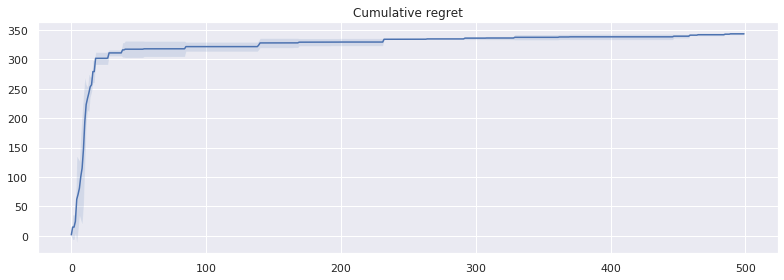

In [6]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(t, mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
    
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

fig.savefig('neural_ucb_linear.pdf')

### NeuralUCB on quadratic rewards

In [7]:
### mean reward function
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: 100*np.dot(a, x)**2

In [8]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = NeuralUCB(bandit,
                      hidden_size=hidden_size,
                      reg_factor=1.0,
                      delta=0.1,
                      confidence_scaling_factor=confidence_scaling_factor,
                      training_window=100,
                      p=p,
                      learning_rate=0.01,
                      epochs=epochs,
                      train_every=train_every,
                      use_cuda=use_cuda,
                     )
    model.run()
    regrets[i] = np.cumsum(model.regrets)

100%|██████████| 500/500 [00:14<00:00, 34.88it/s, total regret=951, % optimal arm=73.60%]


### Sublinear regret growth : the bandit problem is solved efficiently (even though the reward is nonlinear!)

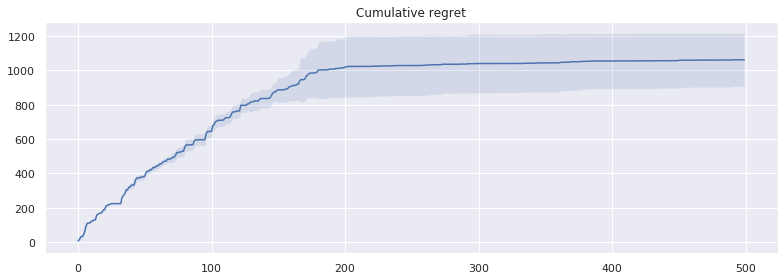

In [9]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(t, mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
    
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

fig.savefig('neural_ucb_quad.pdf')

### NeuralUCB on nonlinear rewards

In [10]:
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
reward_func = lambda x: np.cos(10*np.pi*np.dot(x, a))

In [11]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = NeuralUCB(bandit,
                      hidden_size=hidden_size,
                      reg_factor=1.0,
                      delta=0.1,
                      confidence_scaling_factor=confidence_scaling_factor,
                      training_window=100,
                      p=p,
                      learning_rate=0.01,
                      epochs=epochs,
                      train_every=train_every,
                      use_cuda=use_cuda,
                     )
    model.run()
    regrets[i] = np.cumsum(model.regrets)

100%|██████████| 500/500 [00:14<00:00, 34.53it/s, total regret=667, % optimal arm=82.20%]


### Sublinear regret growth : the bandit problem is solved efficiently (even though the reward is nonlinear!)

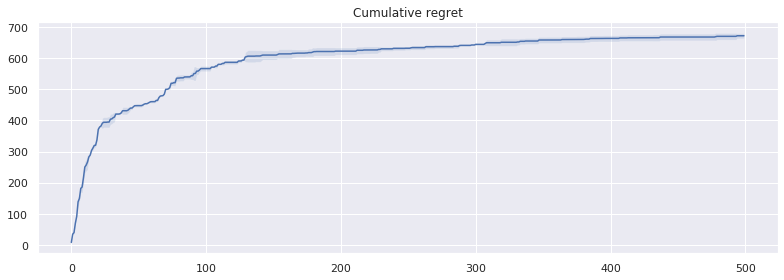

In [12]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(t, mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
    
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

fig.savefig('neural_ucb_cosine.pdf')